In [17]:
import pandas as pd

df = pd.read_csv(r"C:\Users\chandanasree\OneDrive\Documents\data analyst projects\Healthcare-Disease-Prediction\data\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
(df[['Glucose','BloodPressure','BMI','SkinThickness','Insulin']] == 0).sum()

Glucose            5
BloodPressure     35
BMI               11
SkinThickness    227
Insulin          374
dtype: int64

In [29]:
df[['Glucose','BloodPressure','BMI','SkinThickness','Insulin']] = df[['Glucose','BloodPressure','BMI','SkinThickness','Insulin']].replace(0, pd.NA)

In [31]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [33]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median()).infer_objects(copy=False)
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median()).infer_objects(copy=False)
df['BMI'] = df['BMI'].fillna(df['BMI'].median()).infer_objects(copy=False)
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median()).infer_objects(copy=False)
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median()).infer_objects(copy=False)

C:\Users\chandanasree\AppData\Local\Temp\ipykernel_8704\400795779.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median()).infer_objects(copy=False)
C:\Users\chandanasree\AppData\Local\Temp\ipykernel_8704\400795779.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median()).infer_objects(copy=False)
C:\Users\chandanasree\AppData\Local\Temp\ipykernel_8704\400795779.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .

In [35]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7012987012987013
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



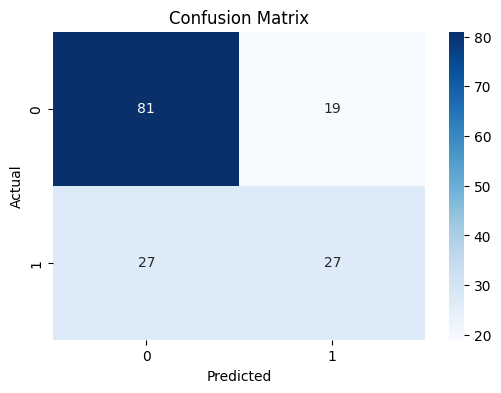

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

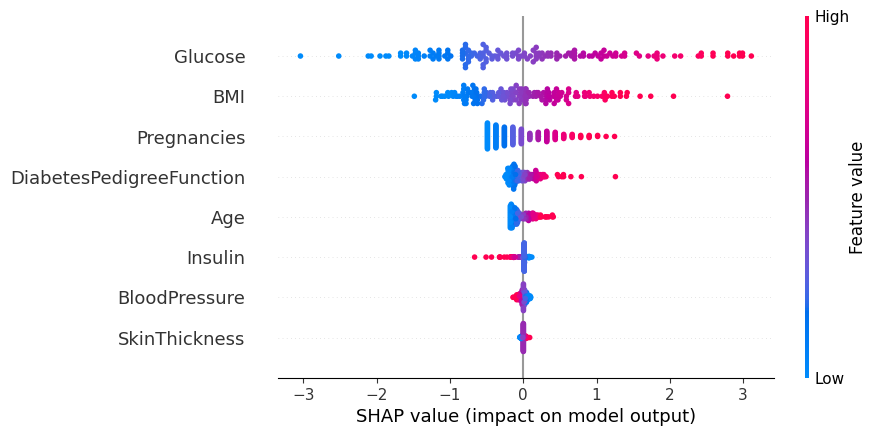

In [46]:
import shap

# create explainer on training data
explainer = shap.Explainer(model, X_train)

# get SHAP values for test data
shap_values = explainer(X_test)

# summary / beeswarm plot
shap.plots.beeswarm(shap_values)

In [52]:
# export clean data for Power BI
df.to_csv(
    r"C:\Users\chandanasree\OneDrive\Documents\data analyst projects\Healthcare-Disease-Prediction\data\diabetes_clean.csv",
    index=False
)